# Scientometric Analysis of Web of Science (WoS) Authors
This Python script performs a scientometric analysis of authors based on their publication records. It processes a dataset of scientific publications to calculate and visualize key metrics for authors, including publication frequency and total citations.

Preprocess the Abstract

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load NLTK resources if not already downloaded
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/paulreonal/Scientometric-Analysis-of-WoS-Authors/main/scientometric-data.csv')

# Display the first few rows of the dataset to understand its structure
print("Original DataFrame:")
print(df.head())

# Function to preprocess text
def preprocess_text(text):
    if pd.isna(text):
        return ""
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply the preprocessing function to the 'TI' column
df['preprocessed_abstract'] = df['TI'].apply(preprocess_text)

# Display the DataFrame with preprocessed abstracts
print("\nDataFrame with Preprocessed Abstracts:")
print(df[['TI', 'preprocessed_abstract']].head())

Original DataFrame:
  PT                                                 AU   BA   BE   GP  \
0  J                                          Gomez, JC  NaN  NaN  NaN   
1  J  Veneroso, JMD; Dias, M; Ueda, A; Ribas, S; Rib...  NaN  NaN  NaN   
2  J                         Kozma, C; Calero-Medina, C  NaN  NaN  NaN   
3  J                        Tsay, MY; Tseng, YW; Wu, TL  NaN  NaN  NaN   
4  J                         Wang, HC; Hsu, TT; Sari, Y  NaN  NaN  NaN   

                                                  AF   BF   CA  \
0                                 Gomez, Juan Carlos  NaN  NaN   
1  de Freitas Veneroso, Joao Mateus; Dias, Marlon...  NaN  NaN   
2                 Kozma, Csaba; Calero-Medina, Clara  NaN  NaN   
3       Tsay, Ming-yueh; Tseng, Yu-wei; Wu, Tai-luan  NaN  NaN   
4        Wang, Hei-Chia; Hsu, Tzu-Ting; Sari, Yunita  NaN  NaN   

                                                  TI              SO  ...  PG  \
0  Analysis of the effect of data properties in a...  SCI

# 1. Retrieve Key Phrases from Abstract

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# dataset
preprocessed_abstracts = df['preprocessed_abstract'].dropna()

# Initialize TF-IDF vectorizer with adjusted parameters
tfidf_vectorizer = TfidfVectorizer(max_features=1000, max_df=0.85, min_df=0.05, stop_words='english')

# Fit and transform the preprocessed abstracts
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_abstracts)

# Get feature names (key phrases)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print some example key phrases
print("Example Key Phrases:")
print(feature_names[:20])

Example Key Phrases:
['academic' 'analysis' 'based' 'bibliometric' 'case' 'citation'
 'collaboration' 'impact' 'journal' 'journals' 'publications' 'research'
 'science' 'scientific' 'study' 'using']


# 2. Author Segmentaion

       Frequency
count   5.000000
mean   14.800000
std     4.969909
min    11.000000
25%    12.000000
50%    12.000000
75%    16.000000
max    23.000000
       Citations
count    5.00000
mean   760.80000
std    335.85741
min    160.00000
25%    911.00000
50%    911.00000
75%    911.00000
max    911.00000
       Citations
count    5.00000
mean   760.80000
std    335.85741
min    160.00000
25%    911.00000
50%    911.00000
75%    911.00000
max    911.00000
Max Frequency: 23
Max Citations: 911.0
Max Citations (Highly Citated Authors): 911.0


<ipython-input-21-64d1702a584f>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Author', data=frequent_publishers, palette='viridis')
<ipython-input-21-64d1702a584f>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Citations', y='Author', data=best_authors, palette='mako')
<ipython-input-21-64d1702a584f>:95: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
<ipython-input-21-64d1702a584f>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same e

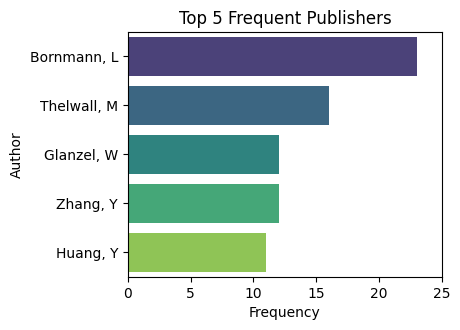

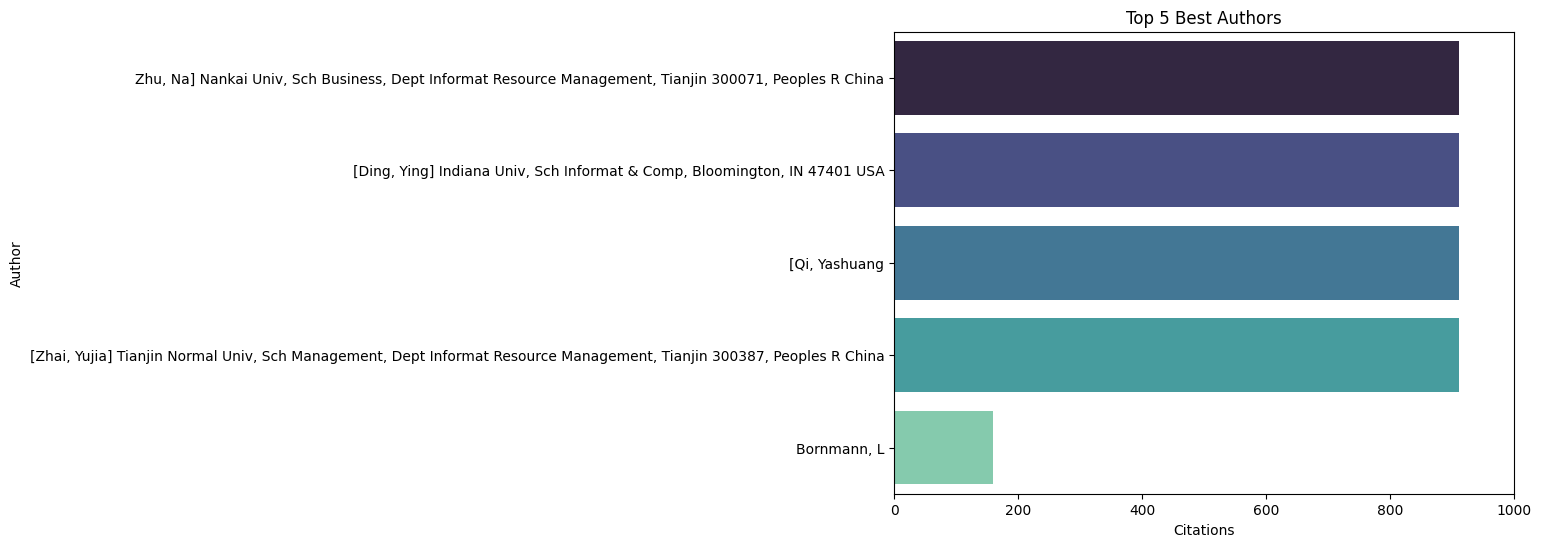

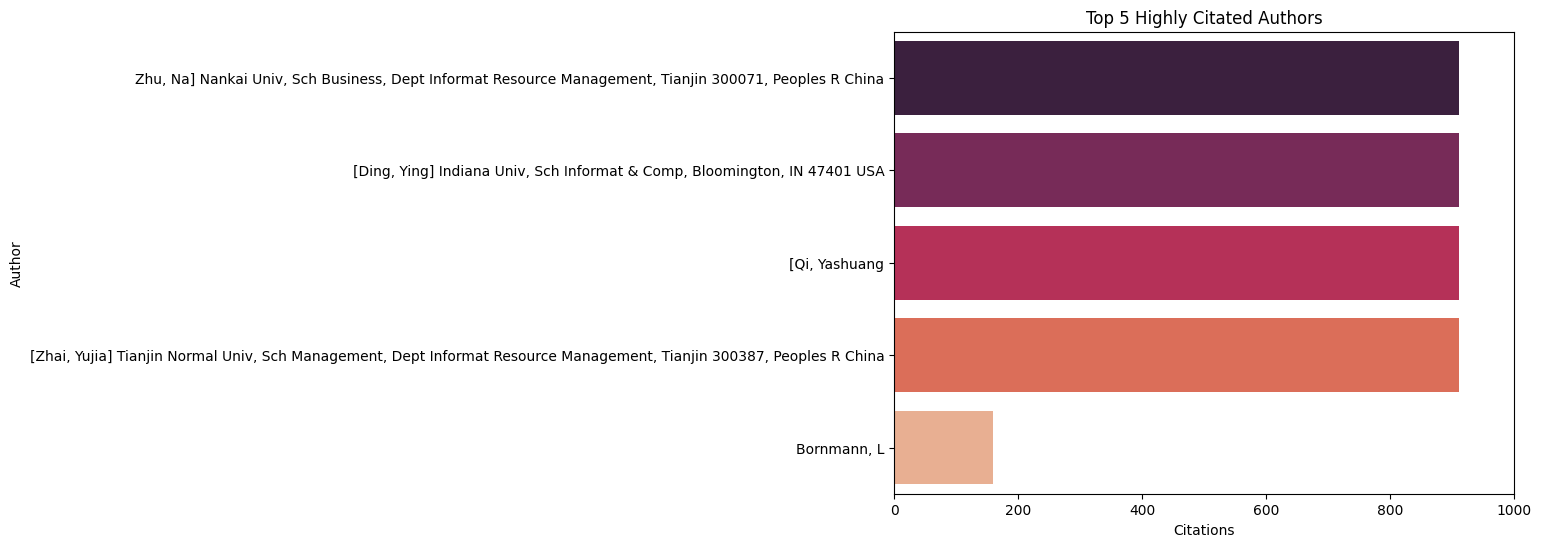

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example function to calculate RFC metrics for authors
def calculate_rfc(df):
    authors_data = []
    for index, row in df.iterrows():
        if pd.notna(row['AU']):  # Check if 'AU' (Authors) is not NaN
            authors = row['AU'].split('; ')  # Split authors by '; ' assuming this separator
            for author in authors:
                if author.strip():  # Ensure author is not empty after stripping spaces
                    authors_data.append({
                        'Author': author.strip(),
                        'Frequency': 1,           # Assuming each row represents a publication
                        'Citations': row.get('TC', 0)  # Assuming 'TC' for total citations, default to 0 if not available
                    })

    authors_df = pd.DataFrame(authors_data)

    # Group by author to aggregate RFC metrics
    rfc_df = authors_df.groupby('Author').agg({
        'Frequency': 'count',     # Counting number of publications as Frequency
        'Citations': 'sum'        # Summing citations as Citations
    }).reset_index()

    return rfc_df

# Function to categorize authors based on RFC metrics
def categorize_authors(rfc_metrics):
    # Frequent Publisher: Highest Frequency
    frequent_publishers = rfc_metrics.nlargest(5, 'Frequency')[['Author', 'Frequency']]

    # Best Author: Highest Citations and possibly high Frequency
    best_authors = rfc_metrics.nlargest(5, ['Citations', 'Frequency'])[['Author', 'Citations']]

    # Highly Citated Authors: Highest Citations
    highly_citated_authors = rfc_metrics.nlargest(5, 'Citations')[['Author', 'Citations']]

    return frequent_publishers, best_authors, highly_citated_authors

# Clean the dataset
def clean_dataset(df):
    # Handle missing values
    df.fillna({'AU': '', 'PY': 0, 'TC': 0}, inplace=True)  # Replace NaN with empty string for 'AU' and 0 for 'PY', 'TC'

    # Convert data types if necessary
    df['PY'] = pd.to_numeric(df['PY'], errors='coerce')  # Convert 'PY' to numeric, coerce errors to NaN
    df['TC'] = pd.to_numeric(df['TC'], errors='coerce')  # Convert 'TC' to numeric, coerce errors to NaN

    return df

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/paulreonal/Scientometric-Analysis-of-WoS-Authors/main/scientometric-data.csv')

# Clean the dataset
df_cleaned = clean_dataset(df)

# Calculate RFC metrics for authors
rfc_metrics = calculate_rfc(df_cleaned)

# Categorize authors based on RFC metrics
frequent_publishers, best_authors, highly_citated_authors = categorize_authors(rfc_metrics)

print(frequent_publishers.describe())
print(best_authors.describe())
print(highly_citated_authors.describe())

print("Max Frequency:", frequent_publishers['Frequency'].max())
print("Max Citations:", best_authors['Citations'].max())
print("Max Citations (Highly Citated Authors):", highly_citated_authors['Citations'].max())

# Plotting each category in separate figures to avoid overlap
plt.figure(figsize=(8, 6))

# Frequent Publishers
plt.subplot(221)
sns.barplot(x='Frequency', y='Author', data=frequent_publishers, palette='viridis')
plt.title('Top 5 Frequent Publishers')
plt.xlabel('Frequency')
plt.ylabel('Author')
plt.xlim(0, 25)  # Adjust the x-axis limits here based on the max Frequency value

plt.tight_layout()

# Best Authors
plt.figure(figsize=(8, 6))
plt.subplot(111)
sns.barplot(x='Citations', y='Author', data=best_authors, palette='mako')
plt.title('Top 5 Best Authors')
plt.xlabel('Citations')
plt.ylabel('Author')
plt.xlim(0, 1000)  # Adjust the x-axis limits here based on the max Citations value

plt.tight_layout()

# Highly Citated Authors
plt.figure(figsize=(8, 6))
plt.subplot(111)
sns.barplot(x='Citations', y='Author', data=highly_citated_authors, palette='rocket')
plt.title('Top 5 Highly Citated Authors')
plt.xlabel('Citations')
plt.ylabel('Author')
plt.xlim(0, 1000)  # Adjust the x-axis limits here based on the max Citations value

plt.tight_layout()

plt.show()


# 3. Extracting major topics using LDA and other techniques

In [ ]:
pip install pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
import string

# Load your dataset
df = pd.read_csv('/scientometric-data.csv')
texts = df['TI'].tolist()

# NLTK setup
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess(text):
    if isinstance(text, str):  # Check if text is a string
        tokens = word_tokenize(text.lower())
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha()]  # Lemmatize and remove punctuation
        tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        return tokens
    else:
        return []  # Return an empty list if text is not a string

# Process all texts
processed_texts = [preprocess(text) for text in texts]

# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Build LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print topics and their top words
print("LDA Topics:")
for topic_id, topic_words in lda_model.print_topics():
    print(f"Topic {topic_id}: {topic_words}")

# Optionally, you can also visualize the topics
import pyLDAvis.gensim_models
lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

LDA Topics:
Topic 0: 0.027*"scientific" + 0.020*"citation" + 0.020*"analysis" + 0.017*"science" + 0.017*"research" + 0.016*"journal" + 0.014*"data" + 0.012*"article" + 0.009*"study" + 0.008*"impact"
Topic 1: 0.011*"model" + 0.009*"citation" + 0.009*"research" + 0.008*"analysis" + 0.008*"article" + 0.008*"patent" + 0.008*"using" + 0.008*"indicator" + 0.008*"author" + 0.008*"impact"
Topic 2: 0.029*"research" + 0.025*"analysis" + 0.020*"science" + 0.017*"publication" + 0.017*"study" + 0.010*"bibliometric" + 0.009*"field" + 0.009*"system" + 0.008*"trend" + 0.008*"network"
Topic 3: 0.030*"doi" + 0.023*"research" + 0.015*"performance" + 0.010*"j" + 0.010*"patent" + 0.009*"effect" + 0.008*"scientometrics" + 0.008*"study" + 0.007*"science" + 0.007*"analysis"
Topic 4: 0.025*"analysis" + 0.022*"network" + 0.022*"research" + 0.021*"citation" + 0.015*"science" + 0.014*"publication" + 0.013*"scientific" + 0.013*"approach" + 0.012*"collaboration" + 0.011*"knowledge"
